### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 6
### Due: Saturday, Mar 22nd at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

# <font color='green'>**PART ONE!**</font>

<font color='orange'>Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. </font>

Solid! Let's start with some basic import statements/impoting the data:

In [68]:
# Import statements 
# As many little things as I can catch now!!
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform

In [69]:
# Organizing the data
data = np.load("hw6_data_1.npy") # Loading the dataset
feature1 = data[:, 0]
feature2 = data[:, 1] 
labels = data[:, 2].astype(int) # Was having trouble bc these were casting as floats. No longer!

I also thought it would be wise to figure out what the labels were before I used them. Here's the print statement for that:

In [70]:
# Figuring out what the labels are
print(labels)

[1 1 1 2 1 4 4 1 3 2 3 0 4 3 1 0 4 4 2 2 1 4 4 1 0 1 4 0 0 3 1 3 2 3 2 0 0
 0 3 1 1 2 2 1 2 2 2 4 2 4 3 0 2 0 0 0 0 1 4 1 0 2 2 0 0 0 4 0 4 0 3 3 1 4
 1 2 0 1 4 3 0 4 3 1 2 3 0 3 0 0 3 0 4 2 4 0 3 2 4 4 1 0 0 2 0 3 4 3 0 1 1
 3 3 3 1 3 3 4 3 1 3 3 2 1 3 0 1 4 4 4 3 3 2 1 1 3 1 0 4 0 2 4 3 4 1 2 3 1
 3 4 4 2 4 4 1 4 4 4 1 2 1 3 0 2 1 0 3 3 0 4 1 4 2 2 0 0 0 4 3 1 3 1 1 1 4
 1 2 0 0 3 0 3 1 2 3 3 0 4 1 3 0 0 4 2 2 1 4 3 0 1 3 0 4 2 4 4 2 4 1 0 4 1
 1 4 4 2 3 2 2 1 3 1 0 4 1 1 1 3 0 4 0 2 1 1 4 0 1 3 0 4 4 4 1 1 0 1 2 0 0
 3 0 1 3 3 2 1 0 0 1 4 1 0 1 2 0 2 0 1 3 4 1 1 3 3 3 2 2 1 0 2 0 0 4 4 2 3
 1 2 2 2 1 1 3 0 3 2 1 0 2 0 3 0 2 0 0 1 2 4 2 0 3 3 4 2 2 3 1 1 1 1 4 0 3
 3 1 2 2 2 2 2 1 2 2 3 0 2 0 4 0 1 2 2 0 4 3 3 0 0 3 2 1 4 3 1 2 4 2 2 4 0
 0 4 2 4 2 0 4 3 0 2 3 3 4 4 1 1 3 2 2 2 2 0 0 0 2 2 3 1 0 3 2 2 1 4 3 1 1
 3 2 1 3 3 1 2 3 0 2 0 3 4 3 3 0 3 1 4 2 2 0 1 0 4 4 0 2 2 0 3 2 4 1 0 0 2
 4 0 4 3 1 2 2 1 1 1 4 2 3 1 1 4 3 3 1 4 3 0 2 4 1 0 2 0 2 4 1 0 2 1 0 2 3
 4 3 1 1 2 0 2 1 4 4 2 1 

Now, we plot the data!

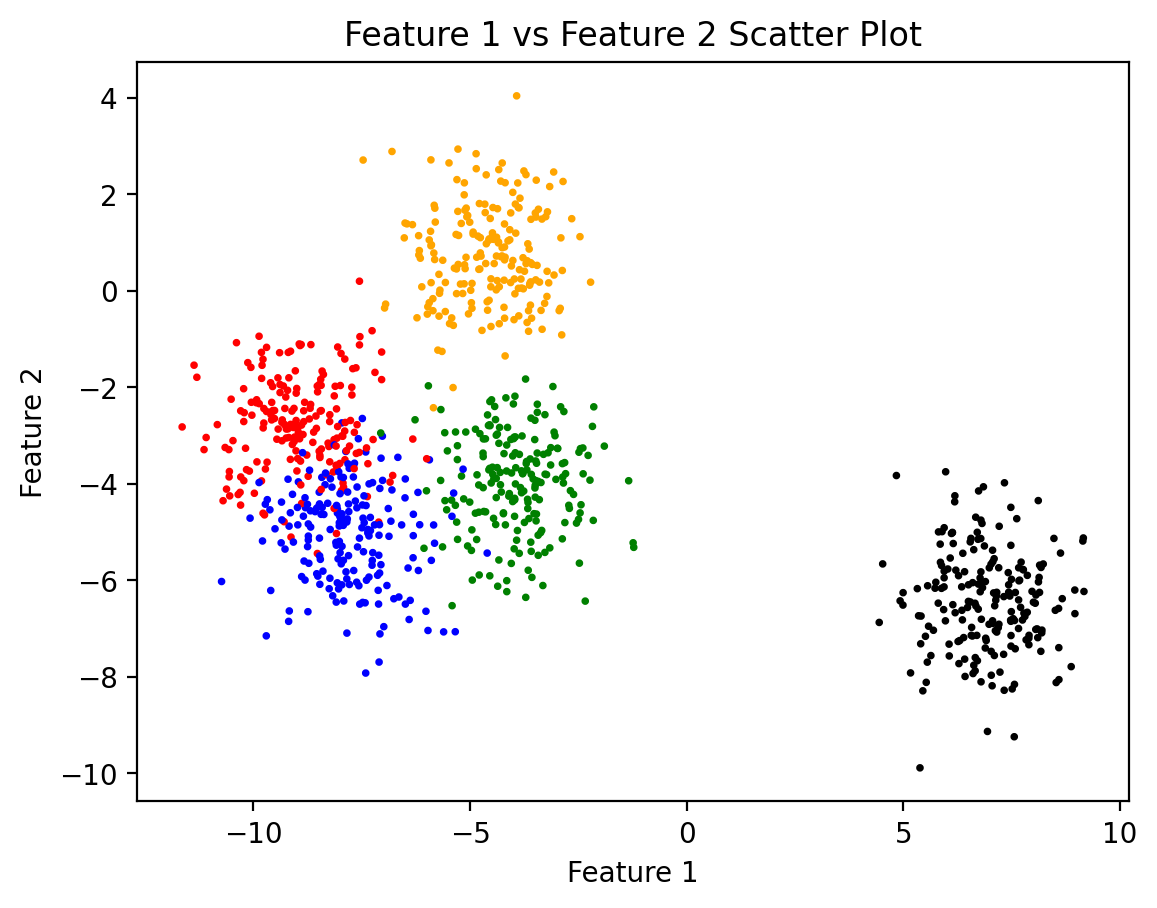

In [71]:
# Using dictionary/list comprehension to assign colors
color_map = {0: 'black', 1: 'red', 2: 'orange', 3: 'green'}
colors = [color_map.get(label, 'blue') for label in labels]

# Plotting!
plt.scatter(feature1, feature2, color=colors, s=3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 vs Feature 2 Scatter Plot")
plt.show()

# <font color='green'>**PART TWO!**</font>

<font color='orange'>Start with kernel density estimation on the data set. First, perform a grid search 5-fold cross-validation to find the best bandwidth, testing 30 bandwidths between 0.1 and 1.0. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. </font>

Perfect! To kick this off, just like in lecture 14, let's start with some import statements:

In [72]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

I am also going to construct a stacked data structure that puts feature 1 and 2 next to each other as columns in a 2D array:

In [73]:
# Doing the stacking
X = np.column_stack((feature1, feature2))

Using the 2D KDE method outlined in the same lecture, here is my attempt at finding the best bandwidth:

In [74]:
# Grid search for optimal bandwidth
bwrange = np.linspace(0.1, 1.0, 30)
K = 5
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bwrange}, cv=K) # Constructing the grid
grid.fit(X)  # Passing the full 2D data

# Extracting the best bandwidth
h_opt = grid.best_params_['bandwidth']
print(f"Optimal bandwidth: {h_opt}")

Optimal bandwidth: 0.4724137931034482


Sweet! Now, we fit the KDE with the optimal bandwidth:

In [75]:
# Fitting KDE with optimal bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X)

KernelDensity(bandwidth=0.4724137931034482)

Using the strategies in the 2D histograms section, I evaluate the model on the grid. Note that, when constructing the linspace, I take the min and max of X and expand the bounds a little bit for safety. Also, I did the data organization differently to get it all working (since I am also kinda confused by the map() function, although I now understand ravel() really well and think it's cool!):

In [76]:
# Creating grid to evaluate density
u = v = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 80)
mesh_u, mesh_v = np.meshgrid(u, v)
Xgrid = np.vstack([mesh_u.ravel(), mesh_v.ravel()]).T

#Evaluating density
dens = np.exp(kde.score_samples(Xgrid))

Now, to plot!

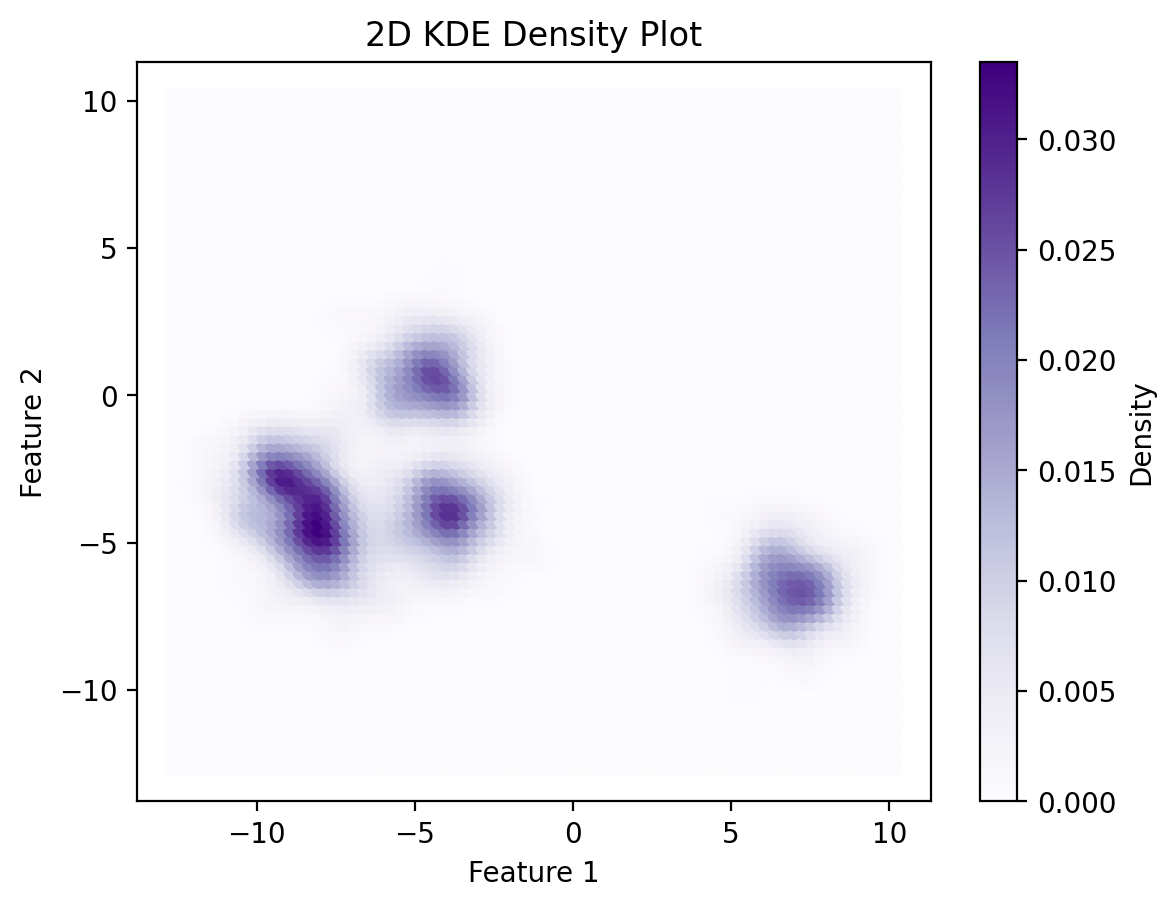

In [77]:
# Plotting the density
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=dens, cmap="Purples", edgecolor="None") # Why he ourple lol
plt.colorbar(label="Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D KDE Density Plot")
plt.show()


# <font color='green'>**PART THREE!**</font>

<font color='orange'>Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution? </font>

Now, we start again! Our only import statement this time is:

In [78]:
from astroML.density_estimation import KNeighborsDensity

Let's set the number of neighbors (I changed this a lot to get the best answer, so note that I did not get lucky on the first try!)

In [79]:
k = 75 # Number of neighbors
N = len(X) # Number of data points

Now, we do the fitting! Also, using the same Xgrid as before, we evalaute the density! (NOTE: we MUST normalize by N!)

In [80]:
# Fitting the Bayesian Nearest Neighbors density estimator
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(X)

# Evaluating the density on the grid
dens_nbrs = nbrs.eval(Xgrid) / N  # NORMALIZE BY N!!!!!

Now, we plot!

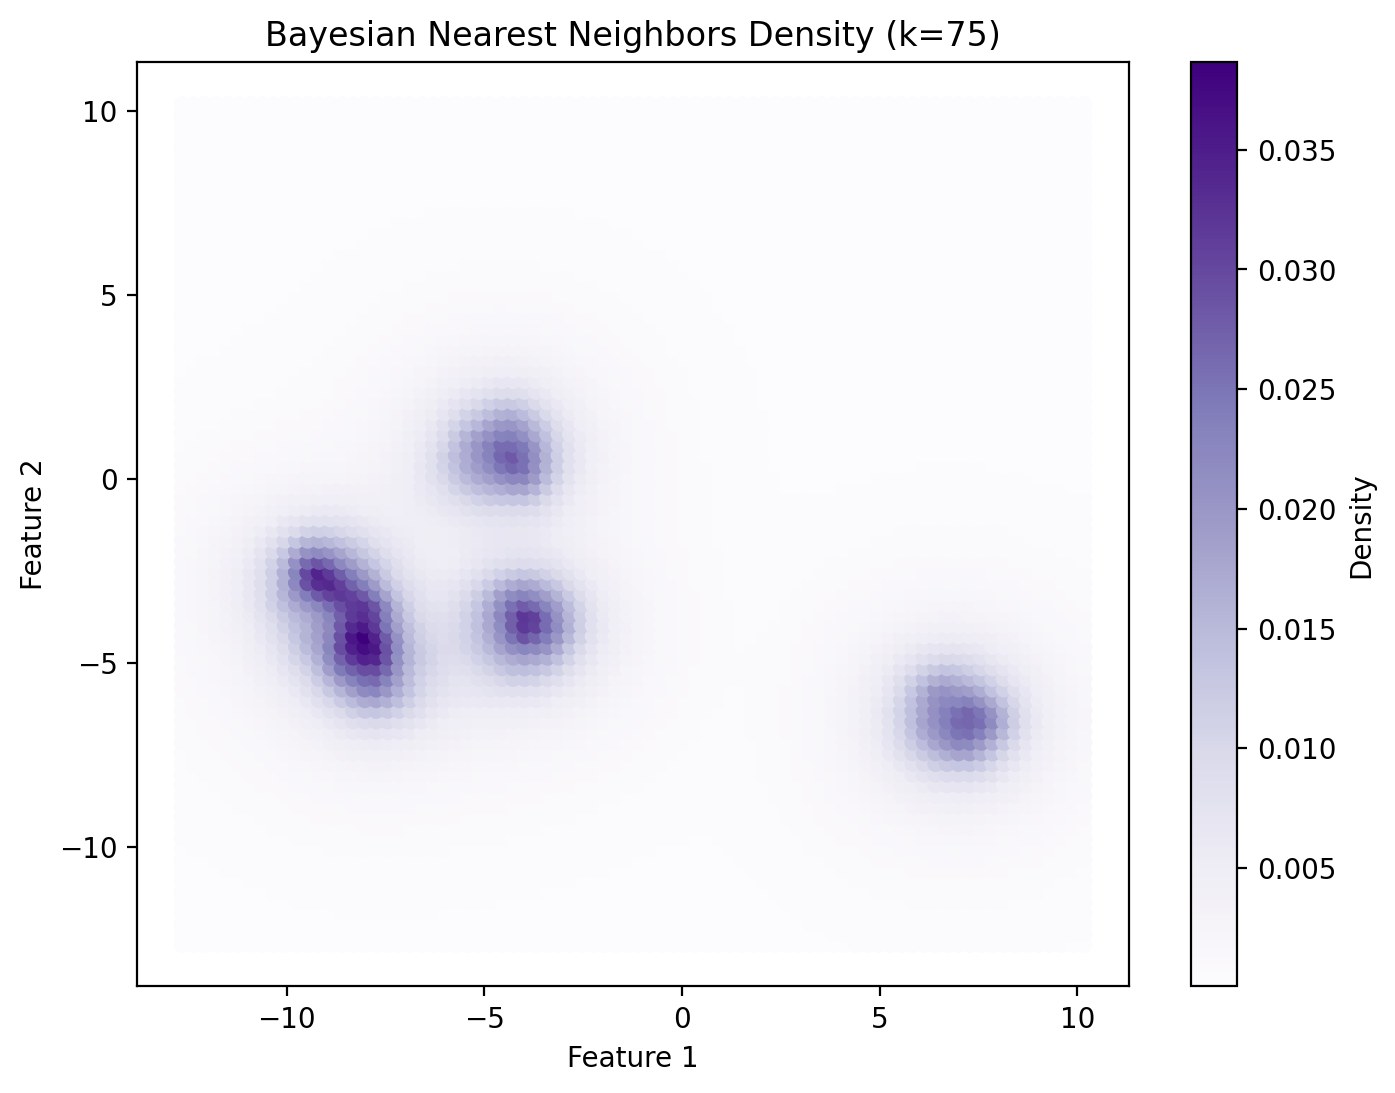

In [81]:
# Plotting!
plt.figure(figsize=(8, 6))
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=dens_nbrs, cmap="Purples", edgecolor="None")
plt.colorbar(label="Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Bayesian Nearest Neighbors Density (k={k})")
plt.show()


From what I've seen, k=75 is about the best I can get it, in terms of looking like the 2D KDE plot. Nice!

# <font color='green'>**PART FOUR!**</font>

<font color='orange'>Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between 1 and 10. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the 2-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*</font>

Here's our new import for this problem:

In [82]:
from sklearn.mixture import GaussianMixture

Here is where I fit the Gaussian mixture model for numbers of components between 1 and 10:

In [83]:
# Fitting models with 1-10 components
N = np.arange(1, 11)
models = [GaussianMixture(n_components=k, covariance_type='full', random_state=0).fit(X) for k in N]

Now, we compute the AIC and BIC:

In [84]:
# Computing AIC and BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

Now, we plot BOTH the AIC and the BIC!!

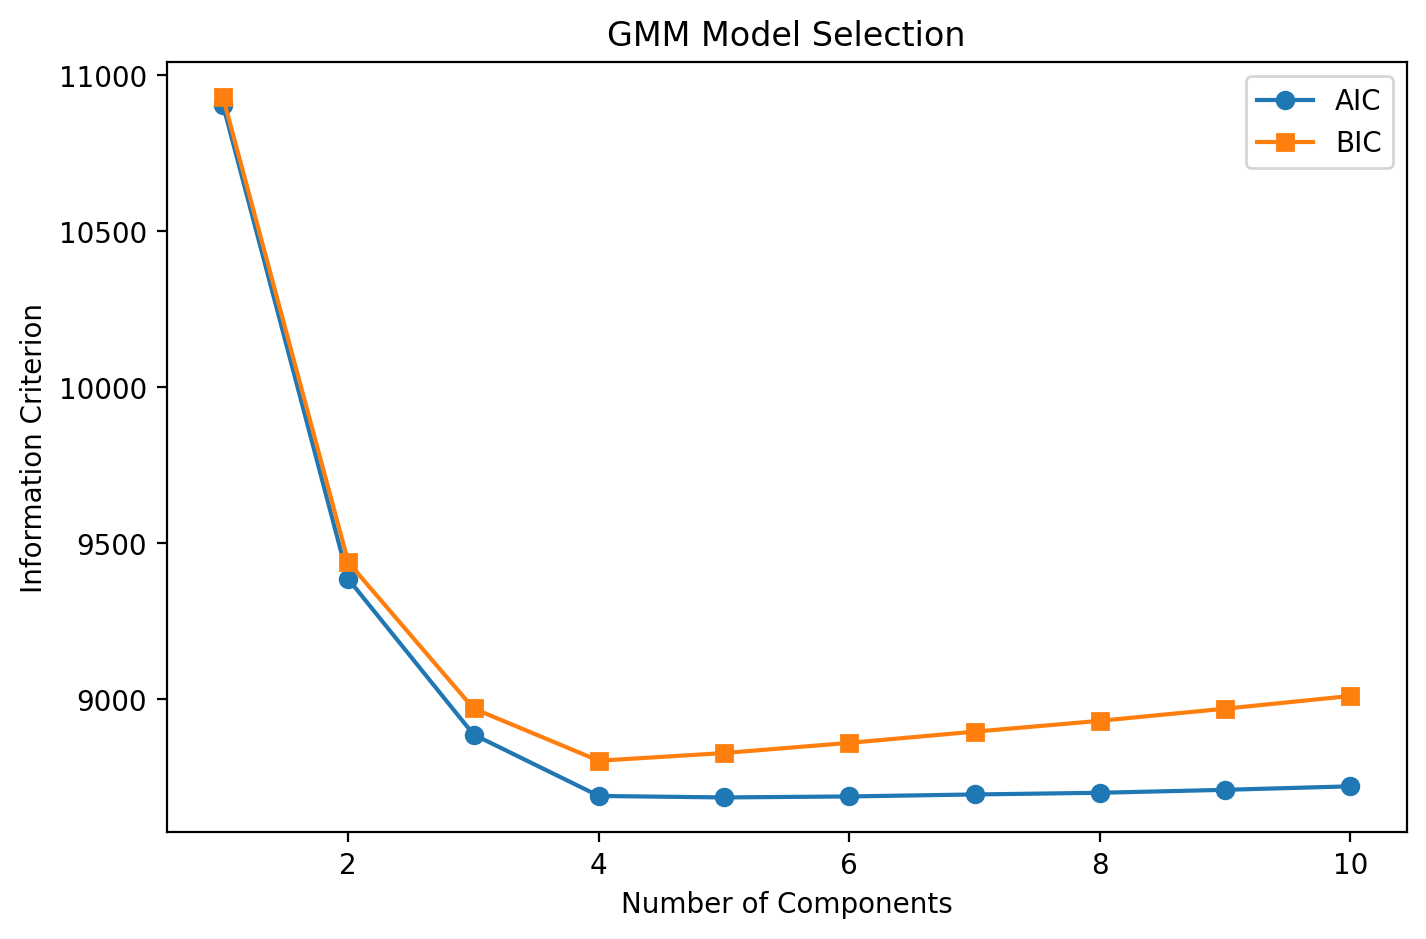

In [85]:
# Plotting AIC/BIC
plt.figure(figsize=(8, 5))
plt.plot(N, AIC, '-o', label='AIC')
plt.plot(N, BIC, '-s', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.title('GMM Model Selection')
plt.show()


What's the optimal number of components? We find whatever value in N goes along with the minimum BIC score, and then select the best gmm model with the minimum BIC score as well:

In [86]:
optimal_components = N[np.argmin(BIC)] # Finding optimal number of components
best_gmm = models[np.argmin(BIC)] # Fitting the best GMM
print(f"Optimal number of components according to BIC: {optimal_components}")

Optimal number of components according to BIC: 4


Nice! Now comes my attempt at drawing ellipses with the code we were given at the outset of this homework:

In [87]:
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[2], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy, sigma_x2 - sigma_y2)
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=mu,
                             width=2 * scale * sigma1, height=2 * scale * sigma2,
                             angle=np.degrees(alpha),
                             **kwargs))

Here is my construction of the BIG plot. First, I plot the data. THEN, I calculate the means for each component, as well as the ellipses that roughly cover their area:

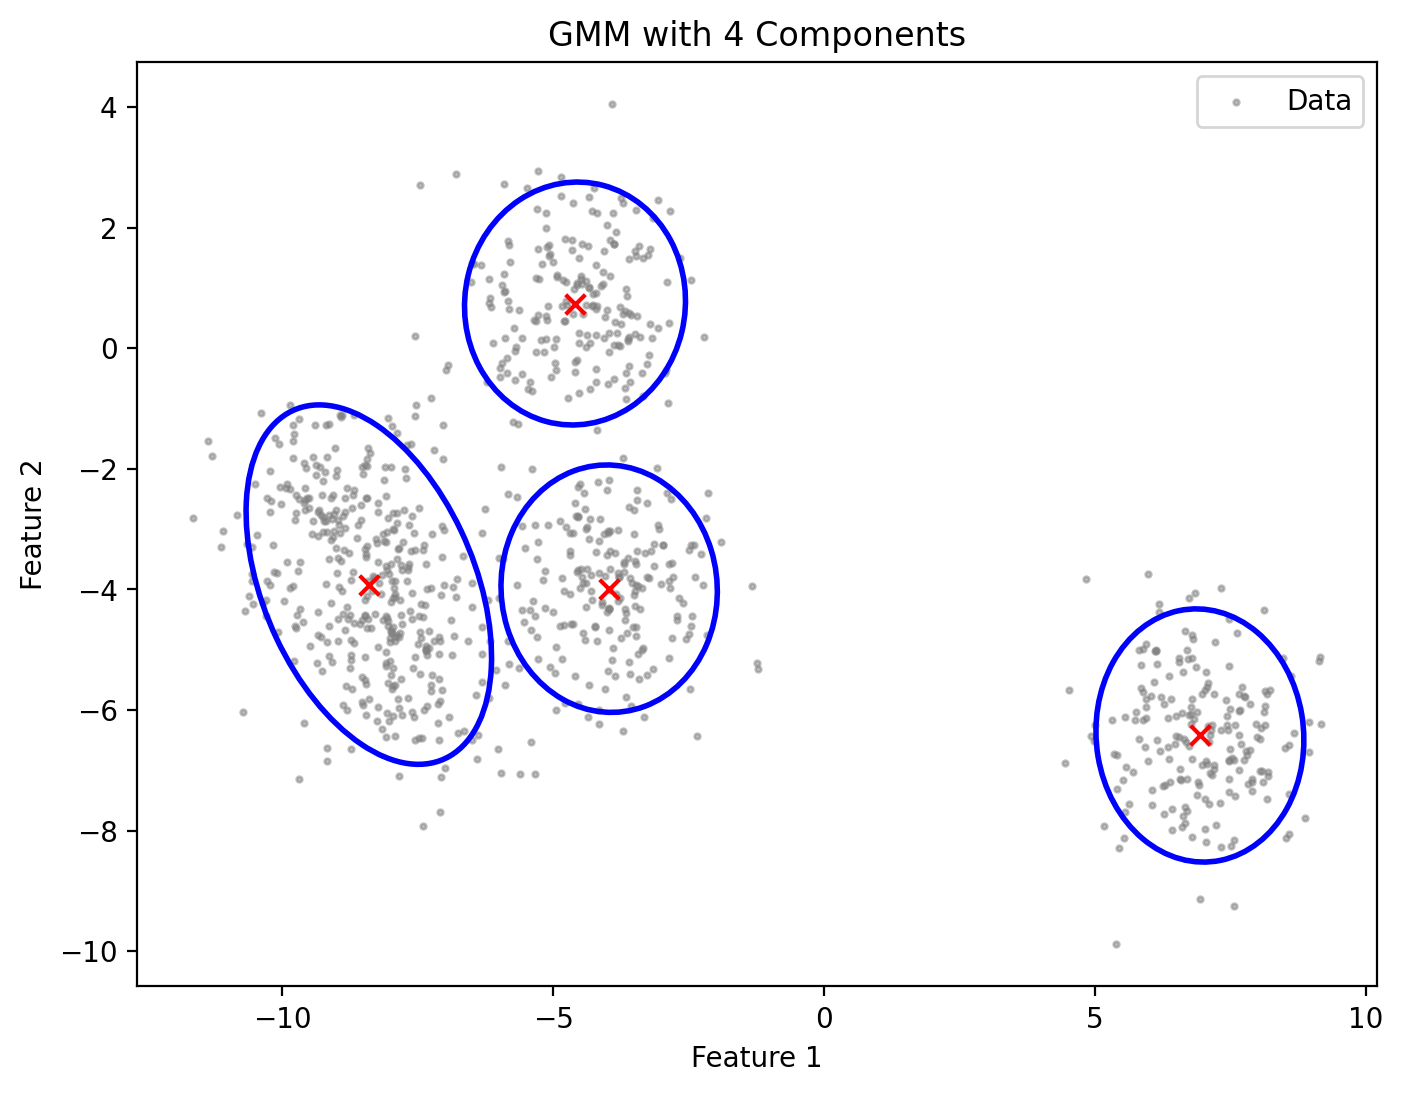

In [88]:
# Plotting the data set
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=4, color='gray', alpha=0.5, label='Data')

# Plotting GMM means and 2-sigma ellipses
for i in range(best_gmm.n_components): # Cool feature of GMM!
    mu = best_gmm.means_[i] # Another one!
    cov = best_gmm.covariances_[i] # Another one!
    plt.scatter(mu[0], mu[1], c='red', s=50, marker='x')  # X marks the spot!
    draw_ellipse(mu, cov, ax=plt.gca(), edgecolor='blue', facecolor='none', lw=2)

# Some other useful plot stuff
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'GMM with {optimal_components} Components')
plt.legend()
plt.show()


Interesting how THIS system found only four components, when the original labels came with five! I will say the two that occupied the furthest left space WERE quite mixed, so, I do not blame unsueprvised learning for mixing them while doing what it's supposed to do.

# <font color='green'>**PART FIVE!**</font>

<font color='orange'>Now try Kmeans clustering with 5 clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed. </font>

Here are our imports for the last time! (Again from lecture 14):

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Here is where I deploy the standard scaler:

In [90]:
# Deploying the standard scaler:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, I deploy KMeans with five clusters!

In [91]:
# Doing the KMeans clustering!
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)


KMeans(n_clusters=5, random_state=0)

Here is where I get the cluster centers, inverse transform to get the cluster centers in the original unscaled coordinates, and predict the labels on the scaled data:

In [92]:
centers_scaled = kmeans.cluster_centers_ # Cluster centers
centers_original = scaler.inverse_transform(centers_scaled) # Inverse transform
labels_pred = kmeans.predict(X_scaled) # Label prediction

Okay, NOW, to end this thing with a bang, I attempt to use my plotting chops to make the two subplots you asked for. The one on the left is the original data colored by the original labels form the dataset, and the one on the right is the one I got from KMeans clustering. Let's finish this out!

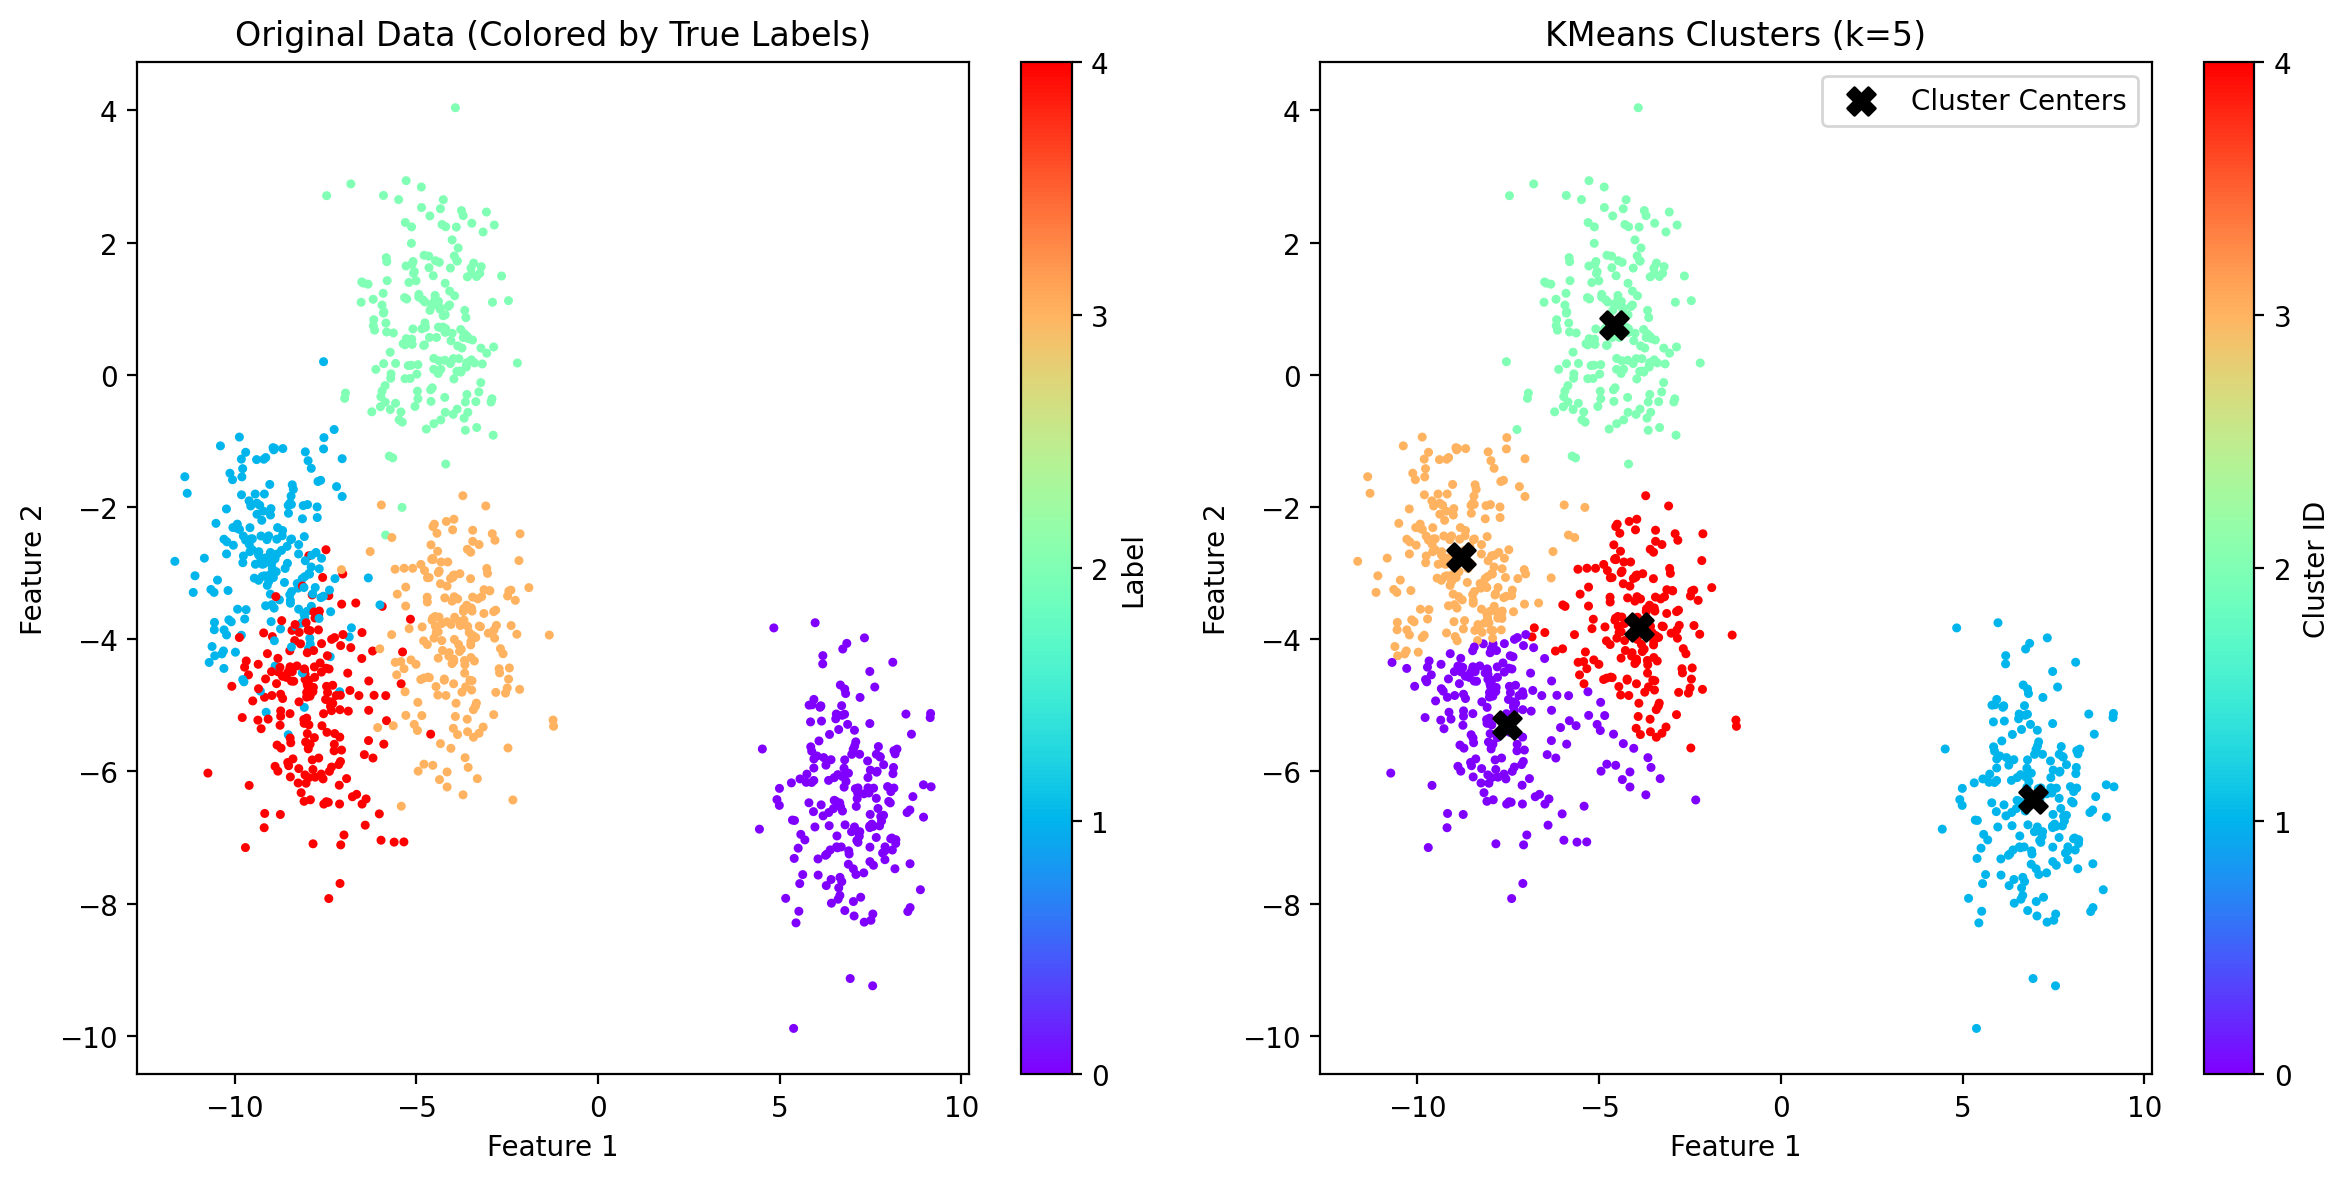

In [93]:
# Creating the subolots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Fixing the colorbar ticks so the ticks display the numbers right (LETS GOOOOO)
num_labels = int(max(np.max(labels), np.max(labels_pred))) + 1 # Also I THINK I switched between max() and np.max() right here

# Panel A: Original Data/true labels
scatter1 = axes[0].scatter(feature1, feature2, c=labels, cmap='rainbow', s=5) # Rainbow looked the prettiest :)
axes[0].set_title("Original Data (Colored by True Labels)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
sidebar1 = fig.colorbar(scatter1, ax=axes[0], ticks=np.arange(num_labels))
sidebar1.set_label("Label")

# Panel B: KMeans clusters
scatter2 = axes[1].scatter(feature1, feature2, c=labels_pred, cmap='rainbow', s=5)
axes[1].scatter(centers_original[:, 0], centers_original[:, 1], c='black', s=100, marker='X', label='Cluster Centers') # X marks the spot!
axes[1].set_title("KMeans Clusters (k=5)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend()
sidebar2 = fig.colorbar(scatter2, ax=axes[1], ticks=np.arange(k)) 
sidebar2.set_label("Cluster ID")

# Making the plots look cool B)
plt.tight_layout()
plt.show()


These, actually, correlate SUPER well! Other than the weird break in the unsupervised model, they look quite similar! Nice!!!!